In [1]:
import numpy as np
from matplotlib import pyplot,cm as plt,cm
from scipy.interpolate import *
from ReferenceElement import *
import os
import imageio
from DG_functions_wave_testing import *

In [23]:
N = 8
K = 8
CF = 2.**(-7)
start = 0.
end = 1.
a1 = 1.
a2 = -1.
alpha = 0.
h = (end-start)/K


reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

In [24]:
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)

In [25]:
def u_test(x,t):
    return x**4+x**3+3*x**2-x+1

In [26]:
u = u_test(x,0)

In [27]:
def du_dx_test(x,t):
    return 4*x**3+3*x**2+6*x-1
du_dx = du_dx_test(x,0)
du_dx_dg =np.array([np.matmul(M_inv_S,u[i])for i in range(len(u))])

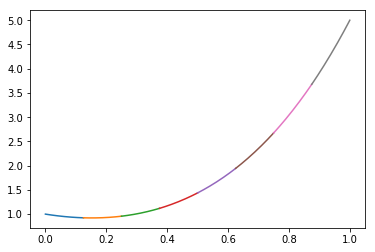

In [28]:
for i in range(len(u)):
    plt.plot(x[i],u[i])

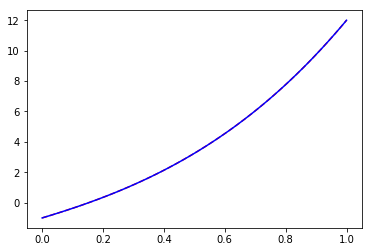

In [29]:
plt.plot(x.flatten(),du_dx.flatten(), linestyle ='--',label = 'analytical', color = 'red')
plt.plot(x.flatten(),du_dx_dg.flatten(), label ='dg',color = 'blue')

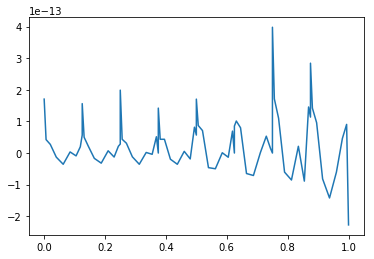

In [32]:
plt.plot(x.flatten(), (du_dx_dg-du_dx).flatten())